<a href="https://colab.research.google.com/github/edmenciab733/odir/blob/main/odir_paso1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/archivo_final.csv'


In [ ]:
data = pd.read_csv(data_path)
data.head()

,ID,label,path,Image
0,0,C,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...
1,1,N,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...
2,3,N,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...
3,4,O,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...
4,5,D,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...


In [ ]:
example_data = data.sample(15, random_state=42)
example_files = list(example_data.path)

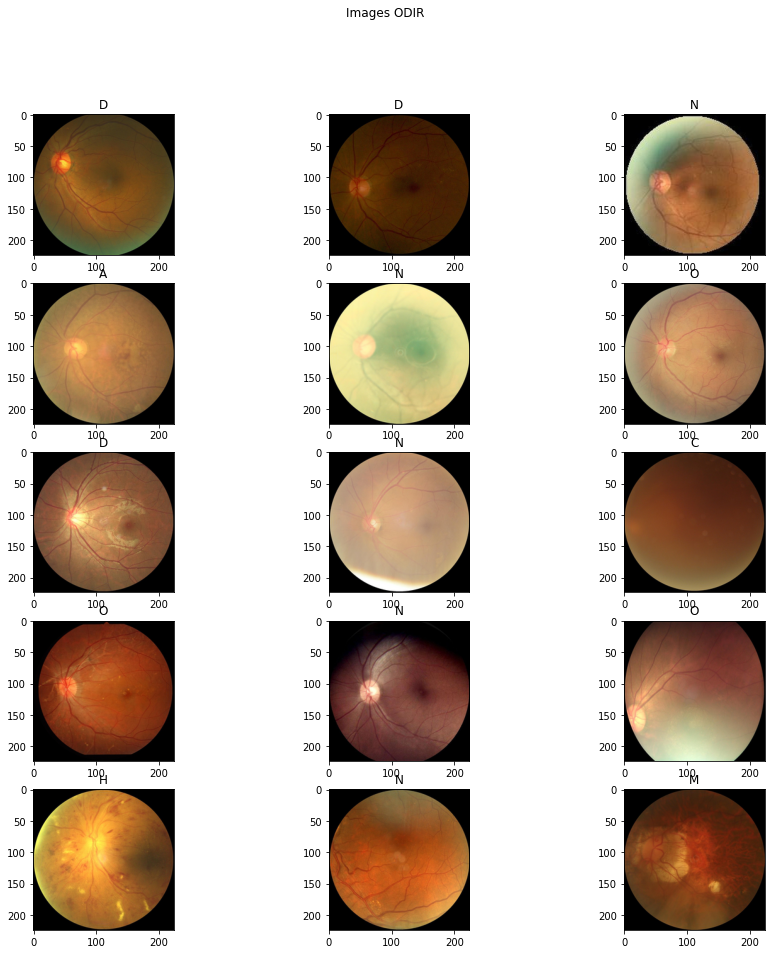

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, file in enumerate(example_files):

    pic = plt.imread(file)
    axs[i].imshow(pic)
    name = example_data.iloc[i].label
    axs[i].set(title=name)

fig.suptitle('Images ODIR')
plt.show()

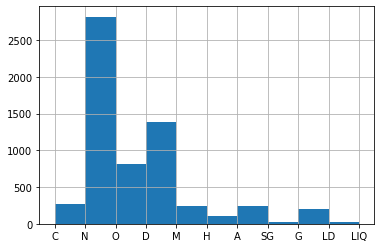

In [ ]:
data['label'].hist()

In [ ]:
df = data[data['label'] != 'SG']
df = df[df['label'] != 'LG']
df = df[df['label'] != 'LIQ']
df = df[df['label'] != 'LD']

In [ ]:
df['label'].value_counts()

N    2817
D    1390
O     813
C     263
M     240
A     238
G     202
H     104
Name: label, dtype: int64

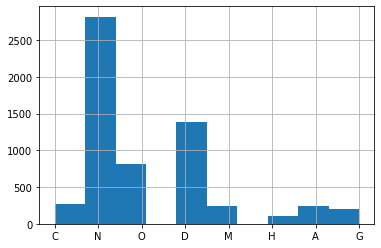

In [ ]:
df['label'].hist()

In [ ]:
import os
import shutil
path = "/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/clases"
if not os.path.exists(path):
    os.makedirs(path)

for index, row in df.iterrows():
  class_path = "{}/{}".format(path, row['label'])
  if not os.path.exists(class_path):
    os.mkdir(class_path)
  image_path =  "{}/{}".format(class_path, row['Image'])
  if not os.path.exists(image_path):
    shutil.copyfile(row['path'], image_path)

In [ ]:
creado_dataset = True
if creado_dataset == False:
  import matplotlib.image as mpimg
  x = []
  for  index, row  in df.iterrows():
    img = mpimg.imread(row['path'])
    x.append(img)
  df['Image'] = x
  dt = df[['ID', 'label', 'path', 'Image']]
  dt.to_pickle('/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/raw_data.pickle')

In [ ]:
test_evaluate = classifier.evaluate(X_test, y_test)
print('Test loss:', test_evaluate[0])
print('Test accuracy:', test_evaluate[1])

25/25 [==============================] - 8s 217ms/step - loss: 0.1915 - accuracy: 0.9766
Test loss: 0.19145406782627106
Test accuracy: 0.9766233563423157


In [ ]:
y_pred  = (classifier.predict(X_test) > 0.5).astype("int32")

25/25 [==============================] - 5s 193ms/step


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       704
         1.0       0.89      0.83      0.86        66

    accuracy                           0.98       770
   macro avg       0.94      0.91      0.92       770
weighted avg       0.98      0.98      0.98       770



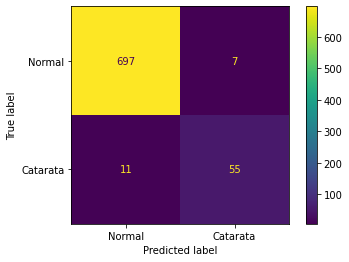

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', 'Catarata'], )
cm_display.plot()
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
def predict(path):
  image_predict = mpimg.imread(path)
  image_predict = np.expand_dims(image_predict, axis = 0)
  result = classifier.predict(image_predict, verbose=0)
  #result = result.argmax(axis=-1)
  return result

In [ ]:
predict("/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/resize/training/2221_right.jpg")

array([[0.9998487]], dtype=float32)

In [ ]:
df_t[df_t.label == 'C']

,Image,Keywords,Age,Sex,Patient Labels,ID,Eye Labels,label,enfer_cant,path,folder,label_numeric
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,69,Female,['C'],0,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
83,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,55,Female,['C'],103,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
95,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,59,Male,"['C', 'O']",119,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
197,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,60,Female,"['C', 'O']",254,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
227,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,69,Female,['C'],294,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4443,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,46,Male,['C'],2239,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
4444,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,64,Male,['C'],2240,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
4445,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,63,Male,['C'],2242,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
4446,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",cataract,80,Male,['C'],2243,['C'],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1.0
